In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import plotly.offline as po 
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("train.csv")

# Data Understanding

In [3]:
df.head()

,Patient_ID,Family_Case_ID,Severity,Name,Birthday_year,Parents or siblings infected,Wife/Husband or children infected,Medical_Expenses_Family,Medical_Tent,City,Deceased
0,1,4696,3,Miss Linda Betty,NaN,0,0,225,NaN,Santa Fe,1
1,2,21436,1,Ms. Ramona Elvira,1966.0,0,1,1663,NaN,Albuquerque,0
2,3,7273,3,Mr. Mario Vernon,1982.0,0,0,221,NaN,Santa Fe,1
3,4,8226,3,Mr. Hector Joe,1997.0,0,0,220,NaN,Santa Fe,1
4,5,19689,3,Ms. Jennie Debra,1994.0,0,0,222,NaN,Santa Fe,0


In [4]:
print(len(df.Patient_ID.unique())) #Check if Patient_ID can be used as index
df = df.set_index("Patient_ID")

900


In [5]:
df.describe()

,Family_Case_ID,Severity,Birthday_year,Parents or siblings infected,Wife/Husband or children infected,Medical_Expenses_Family,Deceased
count,900.000000,900.000000,723.000000,900.000000,900.000000,900.000000,900.000000
mean,14305.827778,2.313333,1990.266943,0.380000,0.521111,895.743333,0.614444
std,25418.153900,0.834223,14.523335,0.803247,1.098385,1385.829926,0.486997
min,345.000000,1.000000,1940.000000,0.000000,0.000000,0.000000,0.000000
25%,8203.000000,2.000000,1982.000000,0.000000,0.000000,221.000000,0.000000
50%,13593.500000,3.000000,1992.000000,0.000000,0.000000,405.000000,1.000000
75%,18906.500000,3.000000,1999.500000,0.000000,1.000000,861.250000,1.000000
max,742836.000000,3.000000,2019.000000,6.000000,8.000000,14345.000000,1.000000


In [6]:
numerical_var = ["Severity","Parents or siblings infected", "Wife/Husband or children infected", "Medical_Expenses_Family"]

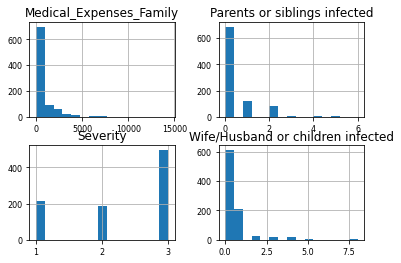

In [7]:
# Histograms for all numeric variables
df[numerical_var].hist(bins=15, layout=(2, 2), xlabelsize=8, ylabelsize=8);

In [8]:
# Family sizes
print(len(df.Family_Case_ID.unique()))
pd.Series(df.Family_Case_ID.value_counts()).value_counts()

675


1    530
2    102
3     24
4     10
7      3
6      3
5      3
Name: Family_Case_ID, dtype: int64

In [9]:
df['Deceased'].count()

900

# Data Preparation

In [10]:
# check NaN values 
df.isnull().sum()

Family_Case_ID                         0
Severity                               0
Name                                   0
Birthday_year                        177
Parents or siblings infected           0
Wife/Husband or children infected      0
Medical_Expenses_Family                0
Medical_Tent                         702
City                                   2
Deceased                               0
dtype: int64

In [11]:
# check unique medical tent values 
df['Medical_Tent'].unique()

array([nan, 'F', 'B', 'A', 'E', 'C', 'D', 'G', 'T'], dtype=object)

In [12]:
# it might make sense to treat NaN values as an extra category, as this could potentially hold information about the target variable
# so let's replace NaN with "n/a"
df['Medical_Tent'] = df['Medical_Tent'].replace(np.nan, 'n/a', regex=True)

In [13]:
df['Birthday_year'].unique()

array([  nan, 1966., 1982., 1997., 1994., 1984., 1989., 2000., 2009.,
       1999., 1991., 2019., 1964., 2017., 1987., 2011., 1998., 2002.,
       1992., 1981., 1990., 1978., 2001., 1958., 1996., 2004., 1962.,
       1970., 1985., 1965., 2018., 1995., 1956., 2003., 1986., 1971.,
       1983., 2005., 1975., 1950., 2016., 2013., 1980., 1979., 2014.,
       1988., 1993., 1968., 2006., 1973., 2007., 2012., 1946., 1974.,
       1972., 2008., 1976., 1961., 1957., 1960., 1959., 2015., 2010.,
       1969., 1949., 1955., 1977., 1963., 1954., 1967., 1940.])

In [14]:
# need to decide what to do with these..
df[df['Birthday_year'].isna()]

,Family_Case_ID,Severity,Name,Birthday_year,Parents or siblings infected,Wife/Husband or children infected,Medical_Expenses_Family,Medical_Tent,City,Deceased
Patient_ID,,,,,,,,,,
1,4696,3,Miss Linda Betty,NaN,0,0,225,n/a,Santa Fe,1
6,17598,2,Master Terrell Bob,NaN,0,0,0,n/a,Santa Fe,1
10,14392,3,Miss Elena Cathy,NaN,1,1,626,F,Albuquerque,0
15,6507,3,Miss Pearl Elsie,NaN,0,0,217,n/a,Taos,0
16,19174,3,Master Alfredo Marty,NaN,0,0,211,n/a,Santa Fe,1
...,...,...,...,...,...,...,...,...,...,...
870,3539,3,Master Duane Dallas,NaN,0,0,423,n/a,Santa Fe,1
871,4275,3,Master Louis Elias,NaN,0,0,202,n/a,Albuquerque,1
872,11524,1,Master Bryan Vincent,NaN,0,0,0,n/a,Santa Fe,1


In [15]:
# check missing city 
df[df['City'].isna()]
# since we only have two records, we can just drop them 
df = df[df['City'].notna()]

In [16]:
df.shape

(898, 10)

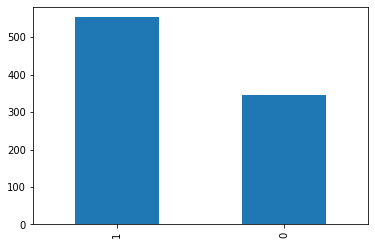

In [17]:
# check target variable distribution
df['Deceased'].value_counts().plot(kind='bar')

In [18]:
# check exact target distrubtion (in %)
print(round(df['Deceased'].value_counts()/df['Deceased'].count()*100, 2))

1    61.58
0    38.42
Name: Deceased, dtype: float64


Imbalance is not that high; we might still consider over/undersampling if prediction performance is low. 

In [19]:
# reset index to avoid issues in further joins
df.reset_index(inplace = True)

# define columns with categorical variables
cat_columns = ['Medical_Tent', 'City']

# create new dataframe with numerical columns only
df_label_encoded = df[df.columns[~df.columns.isin(cat_columns)]].copy()

# will be used as final encoded dataframe
df_encoded = df.copy()

# For each categorical column we fit a label encoder, then one-hot encode that column, 
# and append the new columns to our dataframe

label_encoders = {}
ohe_encoders = {}

for col in cat_columns:
    #print("Encoding {}".format(col))
    new_le = preprocessing.LabelEncoder()
    df_label_encoded[col] = new_le.fit_transform(df[col])
    label_encoders[col] = new_le
    
    new_ohe = tent_ohe = preprocessing.OneHotEncoder()
    x = new_ohe.fit_transform(df[col].values.reshape(-1,1)).toarray()
    
    df_onehot = pd.DataFrame(x, columns = [col +str(label_encoders[col].classes_[i]) for i in range(x.shape[1])])
    df_encoded = pd.concat([df_encoded, df_onehot], axis=1)

In [20]:
df_encoded.head()

,Patient_ID,Family_Case_ID,Severity,Name,Birthday_year,Parents or siblings infected,Wife/Husband or children infected,Medical_Expenses_Family,Medical_Tent,City,...,Medical_TentC,Medical_TentD,Medical_TentE,Medical_TentF,Medical_TentG,Medical_TentT,Medical_Tentn/a,CityAlbuquerque,CitySanta Fe,CityTaos
0,1,4696,3,Miss Linda Betty,NaN,0,0,225,n/a,Santa Fe,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,2,21436,1,Ms. Ramona Elvira,1966.0,0,1,1663,n/a,Albuquerque,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,3,7273,3,Mr. Mario Vernon,1982.0,0,0,221,n/a,Santa Fe,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,4,8226,3,Mr. Hector Joe,1997.0,0,0,220,n/a,Santa Fe,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,5,19689,3,Ms. Jennie Debra,1994.0,0,0,222,n/a,Santa Fe,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [21]:
# exclude the categorical columns
df_encoded = df_encoded[df_encoded.columns[~df_encoded.columns.isin(cat_columns)]]

# Modeling